# <u>Drought Prediction</u>: Comparing Trainig/TestVal Datasets

In [1]:
#Import pandas, numpy, and StandardScaler
import pandas as pd
import numpy as np

#### Load Training Dataset and Soil Dataset.  Convert Training Dataset date variable from object to datetime.

In [2]:
# Local location of the data
# local_data = 'D:\\Data_Science\\DroughtProject\\Data\\' # Location on Windows
local_data = '/home/chad/Data/Drought_Prediction/' # Location on Linux

# Load the dataset that contains training (meteorological variables) resampled weekly with mean, max, min
# and the soil variables that have been merged on the county 'fips' value
tsm = pd.read_csv(local_data + 'train_soil_stats_scaled.csv',
                        parse_dates=['date'],
                        index_col=['index'],
                        header=0)

testval = pd.read_csv(local_data + 'testval_soil_stats_scaled.csv',
                        parse_dates=['date'],
                        index_col=['index'],
                        header=0)

#### Confirm datasets are properly loaded and contain expected datatypes.

In [3]:
tsm.describe()

,fips,score,PRECTOT_mean,PS_mean,QV2M_mean,T2M_mean,T2MDEW_mean,T2MWET_mean,T2M_MAX_mean,T2M_MIN_mean,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
count,2.759904e+06,2.759904e+06,2.759904e+06,2.759904e+06,2.759904e+06,2.759904e+06,2.759904e+06,2.759904e+06,2.759904e+06,2.759904e+06,...,2.759904e+06,2.759904e+06,2.759904e+06,2.759904e+06,2.759904e+06,2.759904e+06,2.759904e+06,2.759904e+06,2.759904e+06,2.759904e+06
mean,3.067038e+04,8.247404e-01,-1.001166e-15,1.155826e-14,2.527314e-16,-4.150936e-15,8.114017e-17,-1.611687e-15,1.675506e-15,1.204929e-15,...,-1.032457e-12,-5.954479e-14,1.877802e-13,2.090737e-13,-2.207101e-13,1.244821e-12,5.241630e-13,-3.497091e-13,-8.097400e-13,-1.202876e-12
std,1.497911e+04,1.223709e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.001000e+03,0.000000e+00,-8.679641e-01,-5.397616e+00,-1.704040e+00,-3.906559e+00,-3.756028e+00,-3.767731e+00,-3.788365e+00,-4.159461e+00,...,-8.953547e-01,-3.406772e-01,-9.672182e-01,-1.535710e+00,-1.521277e+00,-1.278751e+00,-1.317811e+00,-1.243668e+00,-1.241265e+00,-1.262797e+00
25%,1.904450e+04,0.000000e+00,-7.155563e-01,-1.397290e-01,-8.518904e-01,-7.574775e-01,-7.781045e-01,-7.805282e-01,-7.261313e-01,-7.650367e-01,...,-8.905179e-01,-3.362084e-01,-9.184839e-01,-6.968720e-01,-5.421657e-01,-2.811712e-01,-3.470225e-01,-1.594267e-01,-1.477697e-01,-2.798836e-01
50%,2.921200e+04,0.000000e+00,-3.141378e-01,3.055112e-01,-1.947601e-01,9.044091e-02,4.453877e-02,4.216654e-02,1.271888e-01,4.272366e-02,...,-4.538797e-01,-3.137744e-01,-3.987799e-01,-6.968720e-01,-5.421657e-01,-2.811712e-01,-3.470225e-01,-1.594267e-01,-1.477697e-01,-2.798836e-01
75%,4.600750e+04,1.190200e+00,3.719314e-01,6.044432e-01,7.519641e-01,8.395055e-01,8.403878e-01,8.408112e-01,8.120478e-01,8.297795e-01,...,7.304283e-01,-2.074684e-01,8.654024e-01,9.808029e-01,4.369459e-01,-2.811712e-01,-3.470225e-01,-1.594267e-01,-1.477697e-01,-2.798836e-01
max,5.604300e+04,5.000000e+00,1.664626e+01,1.176519e+00,3.044909e+00,2.489916e+00,2.026861e+00,2.032879e+00,2.578427e+00,2.411497e+00,...,2.152497e+00,9.372639e+00,2.053111e+00,4.336153e+00,5.332504e+00,5.704310e+00,5.477708e+00,6.346022e+00,6.413204e+00,5.617596e+00


In [4]:
testval.describe()

,fips,score,PRECTOT_mean,PS_mean,QV2M_mean,T2M_mean,T2MDEW_mean,T2MWET_mean,T2M_MAX_mean,T2M_MIN_mean,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
count,329448.000000,329448.000000,329448.000000,329448.000000,329448.000000,329448.000000,329448.000000,329448.000000,329448.000000,329448.000000,...,3.294480e+05,3.294480e+05,3.294480e+05,3.294480e+05,3.294480e+05,3.294480e+05,3.294480e+05,3.294480e+05,3.294480e+05,3.294480e+05
mean,30670.376770,0.419171,0.100181,0.001944,0.081305,-0.001814,0.074239,0.073029,-0.022668,0.017567,...,2.139260e-13,3.044579e-15,4.954330e-14,-1.420830e-13,2.549254e-14,1.642401e-13,7.236738e-15,3.498992e-14,4.238796e-14,1.210470e-13
std,14979.130122,0.846348,1.089212,0.999512,1.054474,0.998853,1.025902,1.008479,0.993293,1.010412,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,1001.000000,0.000000,-0.867964,-5.348671,-1.715128,-3.904390,-3.971887,-3.755631,-3.595930,-4.098897,...,-8.953547e-01,-3.406772e-01,-9.672182e-01,-1.535710e+00,-1.521277e+00,-1.278751e+00,-1.317811e+00,-1.243668e+00,-1.241265e+00,-1.262797e+00
25%,19044.500000,0.000000,-0.681792,-0.135519,-0.823518,-0.771851,-0.716387,-0.714731,-0.760083,-0.763487,...,-8.905179e-01,-3.362084e-01,-9.184839e-01,-6.968720e-01,-5.421657e-01,-2.811712e-01,-3.470225e-01,-1.594267e-01,-1.477697e-01,-2.798836e-01
50%,29212.000000,0.000000,-0.222693,0.308143,-0.164757,0.059930,0.091654,0.074687,0.076910,0.027371,...,-4.538797e-01,-3.137744e-01,-3.987799e-01,-6.968720e-01,-5.421657e-01,-2.811712e-01,-3.470225e-01,-1.594267e-01,-1.477697e-01,-2.798836e-01
75%,46007.500000,0.429200,0.526215,0.606022,0.927742,0.863405,0.969994,0.957129,0.798441,0.886964,...,7.304283e-01,-2.074684e-01,8.654024e-01,9.808029e-01,4.369459e-01,-2.811712e-01,-3.470225e-01,-1.594267e-01,-1.477697e-01,-2.798836e-01
max,56043.000000,5.000000,23.947061,1.140205,3.031864,2.408555,2.025807,2.018358,2.491605,2.276283,...,2.152497e+00,9.372639e+00,2.053111e+00,4.336153e+00,5.332504e+00,5.704310e+00,5.477708e+00,6.346022e+00,6.413204e+00,5.617596e+00


<AxesSubplot:>

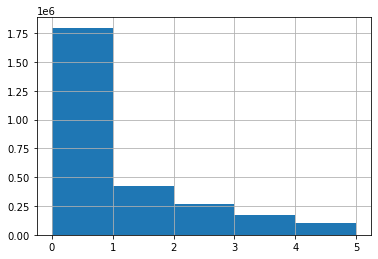

In [5]:
#A histogram detailing the distribution of drought severity within the training dataset.
tsm['score'].hist(bins=5)

<AxesSubplot:>

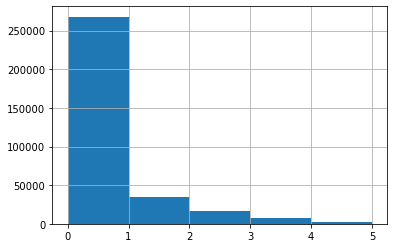

In [6]:
#A histogram detailing the distribution of drought severity within the training dataset.
testval['score'].hist(bins=5)

In [7]:
tsm['score'].value_counts()

0.0000    1481900
1.0000     219575
2.0000     123965
3.0000      82852
4.0000      45866
           ...   
0.7182          1
0.7411          1
0.4927          1
2.9587          1
0.6060          1
Name: score, Length: 55395, dtype: int64

In [8]:
testval['score'].value_counts()

0.0000    223978
1.0000     12433
2.0000      5716
3.0000      1917
4.0000       816
           ...  
1.1073         1
1.3035         1
3.3681         1
4.5910         1
2.1738         1
Name: score, Length: 24420, dtype: int64